*Notebook created by Enric Millán Iglesias for the Bachelor's Thesis (TFG) at BSC (2025).*

**Note:** Upload the ```evaluationW011_train_2011-2012-2013-2014_val_2010_test_2008.csv``` file before running

# Evaluation on Region 11

Training and evaluation was performed on region 11 using the years 2014, 2013, 2012, 2011 for training, 2010 for validation, and 2008 for testing. This way, year 2009, which was used for parameter tuning, is avoided.

## Loading experiment logs

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Load the CSV file
df = pd.read_csv('evaluationW011_train_2011-2012-2013-2014_val_2010_test_2008.csv')

# Display the shape and first few rows
print(f"Loaded {df.shape[0]} rows and {df.shape[1]} columns")
df.head()

Loaded 36 rows and 58 columns


,timestamp,model_name,model_path,region,start_year,end_year,train_years,test_years,model_type,cell_type,...,r2_clipped,mse_corrected,rmse_corrected,mae_corrected,r2_corrected,bias_correction,train_losses,val_losses,num_model_parameters,training_curve_path
0,20250512_124655,BackwardLAIPredictor,/gpfs/scratch/bsc32/ai4land/saved_data/Backwar...,W011,2008,2014,2010-2011-2012-2013-2014,2008,rnn,rnn,...,0.98493,0.08458,0.29082,0.17491,0.98430,0.03432,"0.95217,0.43970,0.38448,0.32732,0.27191,0.2289...","0.11532,0.10813,0.10509,0.09623,0.09575,0.0997...",14465,/gpfs/scratch/bsc32/ai4land/saved_data/trainin...
1,20250512_124655,BackwardLAIPredictor,/gpfs/scratch/bsc32/ai4land/saved_data/Backwar...,W011,2008,2014,2010-2011-2012-2013-2014,2008,rnn,rnn,...,0.98579,0.07602,0.27571,0.14848,0.98581,0.01000,"0.64389,0.09770,0.09247,0.08937,0.08724,0.0856...","0.10612,0.09731,0.09600,0.09835,0.09513,0.0952...",14465,/gpfs/scratch/bsc32/ai4land/saved_data/trainin...
2,20250512_124655,BackwardLAIPredictor,/gpfs/scratch/bsc32/ai4land/saved_data/Backwar...,W011,2008,2014,2010-2011-2012-2013-2014,2008,rnn,rnn,...,0.98542,0.07767,0.27870,0.14887,0.98546,0.01341,"0.66476,0.10369,0.09584,0.09233,0.08964,0.0876...","0.11241,0.10218,0.09982,0.09393,0.09423,0.0930...",14465,/gpfs/scratch/bsc32/ai4land/saved_data/trainin...
3,20250512_124655,BackwardLAIPredictor,/gpfs/scratch/bsc32/ai4land/saved_data/Backwar...,W011,2008,2014,2010-2011-2012-2013-2014,2008,rnn,rnn,...,0.98533,0.07833,0.27987,0.14975,0.98533,0.00107,"0.51091,0.09624,0.09040,0.08798,0.08617,0.0849...","0.10396,0.09404,0.09425,0.09353,0.09316,0.0941...",14465,/gpfs/scratch/bsc32/ai4land/saved_data/trainin...
4,20250512_124655,BackwardLAIPredictor,/gpfs/scratch/bsc32/ai4land/saved_data/Backwar...,W011,2008,2014,2010-2011-2012-2013-2014,2008,rnn,rnn,...,0.98508,0.08023,0.28325,0.15847,0.98506,0.00643,"1.01090,0.42864,0.38013,0.32855,0.27728,0.2336...","0.11301,0.10439,0.10122,0.09876,0.09867,0.0984...",14465,/gpfs/scratch/bsc32/ai4land/saved_data/trainin...


## Best results for Vanilla RNN

### Individual runs

In [2]:
# Filter only RNN runs
df_rnn = df[df['cell_type'] == 'rnn']

# Metrics to evaluate
metrics = ['mae', 'rmse', 'mse', 'r2']
ascending_order = {'mae': True, 'rmse': True, 'mse': True, 'r2': False}

# Columns to display
display_columns = ['dropout', 'weight_decay', 'hidden_size',
                   'mae', 'rmse', 'mse', 'r2', 'training_duration_sec', 'early_stopping_patience', 'best_epoch']

# Loop through each metric and display top 3 configurations
for metric in metrics:
    print(f"\nTop 3 Individual RNN Runs by {metric.upper()}:")
    ascending = metric != 'r2'  # R² is better when higher
    top_configs = df_rnn.sort_values(by=metric, ascending=ascending).head(3)
    display(top_configs[display_columns])


Top 3 Individual RNN Runs by MAE:


,dropout,weight_decay,hidden_size,mae,rmse,mse,r2,training_duration_sec,early_stopping_patience,best_epoch
1,0.0,0.0,64,0.14851,0.27587,0.07611,0.98579,342.72,5,8
2,0.0,0.0,64,0.14884,0.27900,0.07784,0.98542,368.89,5,9
3,0.0,0.0,64,0.14971,0.27987,0.07833,0.98533,396.32,5,10



Top 3 Individual RNN Runs by RMSE:


,dropout,weight_decay,hidden_size,mae,rmse,mse,r2,training_duration_sec,early_stopping_patience,best_epoch
1,0.0,0.0,64,0.14851,0.27587,0.07611,0.98579,342.72,5,8
2,0.0,0.0,64,0.14884,0.27900,0.07784,0.98542,368.89,5,9
3,0.0,0.0,64,0.14971,0.27987,0.07833,0.98533,396.32,5,10



Top 3 Individual RNN Runs by MSE:


,dropout,weight_decay,hidden_size,mae,rmse,mse,r2,training_duration_sec,early_stopping_patience,best_epoch
1,0.0,0.0,64,0.14851,0.27587,0.07611,0.98579,342.72,5,8
2,0.0,0.0,64,0.14884,0.27900,0.07784,0.98542,368.89,5,9
3,0.0,0.0,64,0.14971,0.27987,0.07833,0.98533,396.32,5,10



Top 3 Individual RNN Runs by R2:


,dropout,weight_decay,hidden_size,mae,rmse,mse,r2,training_duration_sec,early_stopping_patience,best_epoch
1,0.0,0.0,64,0.14851,0.27587,0.07611,0.98579,342.72,5,8
2,0.0,0.0,64,0.14884,0.27900,0.07784,0.98542,368.89,5,9
3,0.0,0.0,64,0.14971,0.27987,0.07833,0.98533,396.32,5,10


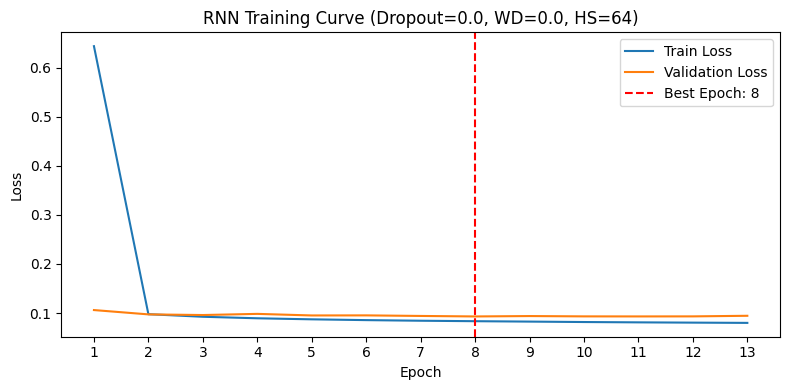

In [3]:
# Get best run per metric for RNN
best_rnn_runs = []
for metric in metrics:
    run = df_rnn.sort_values(by=metric, ascending=ascending_order[metric]).iloc[0]
    best_rnn_runs.append(run)

# Convert to DataFrame and drop duplicates (e.g., same config wins multiple metrics)
best_rnn_df = pd.DataFrame(best_rnn_runs).drop_duplicates(subset=['dropout', 'weight_decay', 'hidden_size'])

# Plot training curves for RNN
for i, row in best_rnn_df.iterrows():
    train_losses = ast.literal_eval(row['train_losses'])
    val_losses = ast.literal_eval(row['val_losses'])
    best_epoch = row['best_epoch']

    epochs = range(1, len(train_losses) + 1)  # Epochs start from 1

    plt.figure(figsize=(8, 4))
    plt.plot(epochs, train_losses, label='Train Loss')
    plt.plot(epochs, val_losses, label='Validation Loss')
    plt.axvline(x=best_epoch, color='r', linestyle='--', label=f'Best Epoch: {best_epoch}')
    plt.title(f"RNN Training Curve (Dropout={row['dropout']}, WD={row['weight_decay']}, HS={row['hidden_size']})")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.xticks(epochs)
    plt.legend()
    plt.tight_layout()
    plt.show()

### Average (by configuration)

In [4]:
# Group by RNN configuration to average results
df_grouped_rnn = df_rnn.groupby(['dropout', 'weight_decay', 'hidden_size']).mean(numeric_only=True).reset_index()

# Columns to display
display_columns = ['dropout', 'weight_decay', 'hidden_size',
                   'mae', 'rmse', 'mse', 'r2', 'training_duration_sec', 'early_stopping_patience', 'best_epoch']

# Loop through each metric and display top 3 averaged RNN configurations
for metric in metrics:
    print(f"\nTop Averaged RNN Configurations by {metric.upper()}:")
    ascending = metric != 'r2'  # R² is better when higher
    top_configs = df_grouped_rnn.sort_values(by=metric, ascending=ascending).head(3)
    display(top_configs[display_columns])


Top Averaged RNN Configurations by MAE:


,dropout,weight_decay,hidden_size,mae,rmse,mse,r2,training_duration_sec,early_stopping_patience,best_epoch
0,0.0,0.00000,64,0.150578,0.280158,0.078497,0.985305,435.923333,7.5,10.166667
1,0.5,0.00001,64,0.165977,0.291855,0.085252,0.984062,461.286667,7.5,12.333333



Top Averaged RNN Configurations by RMSE:


,dropout,weight_decay,hidden_size,mae,rmse,mse,r2,training_duration_sec,early_stopping_patience,best_epoch
0,0.0,0.00000,64,0.150578,0.280158,0.078497,0.985305,435.923333,7.5,10.166667
1,0.5,0.00001,64,0.165977,0.291855,0.085252,0.984062,461.286667,7.5,12.333333



Top Averaged RNN Configurations by MSE:


,dropout,weight_decay,hidden_size,mae,rmse,mse,r2,training_duration_sec,early_stopping_patience,best_epoch
0,0.0,0.00000,64,0.150578,0.280158,0.078497,0.985305,435.923333,7.5,10.166667
1,0.5,0.00001,64,0.165977,0.291855,0.085252,0.984062,461.286667,7.5,12.333333



Top Averaged RNN Configurations by R2:


,dropout,weight_decay,hidden_size,mae,rmse,mse,r2,training_duration_sec,early_stopping_patience,best_epoch
0,0.0,0.00000,64,0.150578,0.280158,0.078497,0.985305,435.923333,7.5,10.166667
1,0.5,0.00001,64,0.165977,0.291855,0.085252,0.984062,461.286667,7.5,12.333333


## Best results for LSTM

### Individual runs

In [5]:
# Filter only LSTM runs
df_lstm = df[df['cell_type'] == 'lstm']

# Loop through each metric and display top 3 configurations
for metric in metrics:
    print(f"\nTop 3 Individual LSTM Runs by {metric.upper()}:")
    ascending = metric != 'r2'  # R² is better when higher
    top_configs = df_lstm.sort_values(by=metric, ascending=ascending).head(3)
    display(top_configs[display_columns])


Top 3 Individual LSTM Runs by MAE:


,dropout,weight_decay,hidden_size,mae,rmse,mse,r2,training_duration_sec,early_stopping_patience,best_epoch
15,0.0,0.0,128,0.14699,0.28198,0.07951,0.98504,1051.84,5,3
33,0.0,0.0,128,0.14798,0.28332,0.08027,0.98495,1840.32,10,4
17,0.0,0.0,128,0.14801,0.28453,0.08095,0.98476,1578.29,5,7



Top 3 Individual LSTM Runs by RMSE:


,dropout,weight_decay,hidden_size,mae,rmse,mse,r2,training_duration_sec,early_stopping_patience,best_epoch
22,0.25,0.0,32,0.15124,0.27649,0.07645,0.98572,526.26,10,20
24,0.25,0.0,32,0.15492,0.27813,0.07736,0.98558,515.25,10,16
6,0.25,0.0,32,0.15359,0.27981,0.07829,0.98536,486.74,5,14



Top 3 Individual LSTM Runs by MSE:


,dropout,weight_decay,hidden_size,mae,rmse,mse,r2,training_duration_sec,early_stopping_patience,best_epoch
22,0.25,0.0,32,0.15124,0.27649,0.07645,0.98572,526.26,10,20
24,0.25,0.0,32,0.15492,0.27813,0.07736,0.98558,515.25,10,16
6,0.25,0.0,32,0.15359,0.27981,0.07829,0.98536,486.74,5,14



Top 3 Individual LSTM Runs by R2:


,dropout,weight_decay,hidden_size,mae,rmse,mse,r2,training_duration_sec,early_stopping_patience,best_epoch
22,0.25,0.0,32,0.15124,0.27649,0.07645,0.98572,526.26,10,20
24,0.25,0.0,32,0.15492,0.27813,0.07736,0.98558,515.25,10,16
5,0.25,0.0,32,0.15334,0.27993,0.07836,0.98536,461.71,5,13


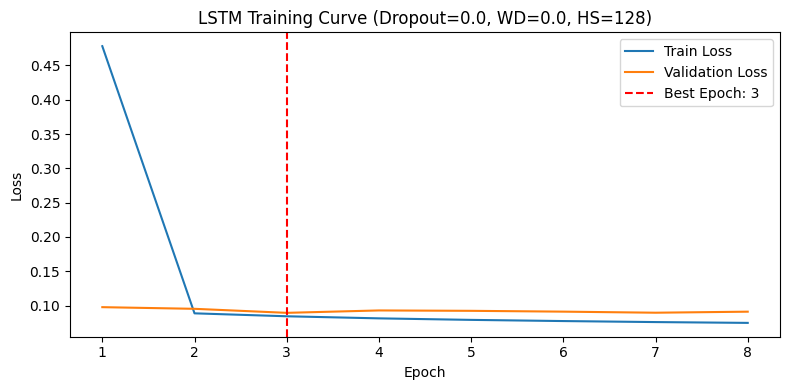

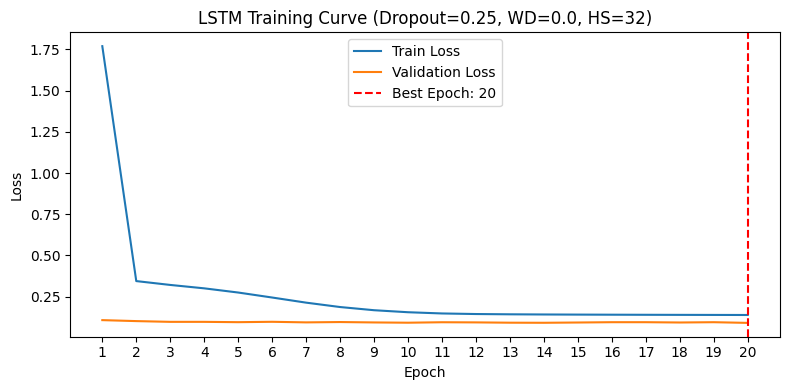

In [6]:
# Get best run per metric for LSTM
best_lstm_runs = []
for metric in metrics:
    run = df_lstm.sort_values(by=metric, ascending=ascending_order[metric]).iloc[0]
    best_lstm_runs.append(run)

# Convert to DataFrame and drop duplicates (e.g., same config wins multiple metrics)
best_lstm_df = pd.DataFrame(best_lstm_runs).drop_duplicates(subset=['dropout', 'weight_decay', 'hidden_size'])

# Plot training curves for LSTM
for i, row in best_lstm_df.iterrows():
    train_losses = ast.literal_eval(row['train_losses'])
    val_losses = ast.literal_eval(row['val_losses'])
    best_epoch = row['best_epoch']

    epochs = range(1, len(train_losses) + 1)  # Epochs start from 1

    plt.figure(figsize=(8, 4))
    plt.plot(epochs, train_losses, label='Train Loss')
    plt.plot(epochs, val_losses, label='Validation Loss')
    plt.axvline(x=best_epoch, color='r', linestyle='--', label=f'Best Epoch: {best_epoch}')
    plt.title(f"LSTM Training Curve (Dropout={row['dropout']}, WD={row['weight_decay']}, HS={row['hidden_size']})")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.xticks(epochs)
    plt.legend()
    plt.tight_layout()
    plt.show()


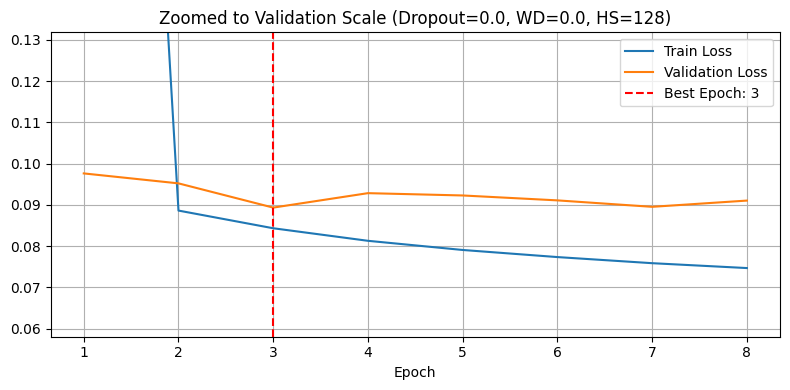

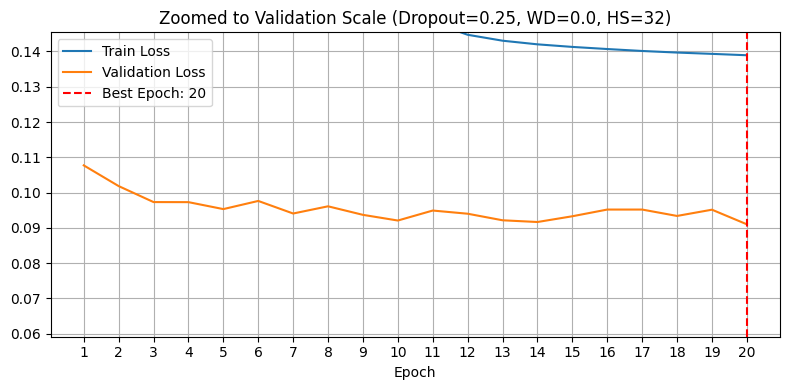

In [7]:
# Plot zoomed-in training curves for LSTM
for i, row in best_lstm_df.iterrows():
    train_losses = ast.literal_eval(row['train_losses'])
    val_losses = ast.literal_eval(row['val_losses'])
    best_epoch = row['best_epoch']

    epochs = range(1, len(train_losses) + 1)  # Epochs start from 1

    # Zoomed-in plot (validation scale)
    plt.figure(figsize=(8, 4))
    plt.plot(epochs, train_losses, label='Train Loss')
    plt.plot(epochs, val_losses, label='Validation Loss')
    plt.axvline(x=best_epoch, color='r', linestyle='--', label=f'Best Epoch: {best_epoch}')
    plt.ylim(min(val_losses) * 0.65, max(val_losses) * 1.35)
    plt.title(f"Zoomed to Validation Scale (Dropout={row['dropout']}, WD={row['weight_decay']}, HS={row['hidden_size']})")
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid(True)
    plt.xticks(epochs)
    plt.tight_layout()
    plt.show()

### Average (by configuration)

In [8]:
# Group by LSTM configuration to average results
df_grouped_lstm = df_lstm.groupby(['dropout', 'weight_decay', 'hidden_size']).mean(numeric_only=True).reset_index()

# Columns to display
display_columns = ['dropout', 'weight_decay', 'hidden_size',
                   'mae', 'rmse', 'mse', 'r2', 'training_duration_sec', 'early_stopping_patience', 'best_epoch']

# Loop through each metric and display top 3 averaged LSTM configurations
for metric in metrics:
    print(f"\nTop Averaged LSTM Configurations by {metric.upper()}:")
    ascending = metric != 'r2'  # R² is better when higher
    top_configs = df_grouped_lstm.sort_values(by=metric, ascending=ascending).head(3)
    display(top_configs[display_columns])


Top Averaged LSTM Configurations by MAE:


,dropout,weight_decay,hidden_size,mae,rmse,mse,r2,training_duration_sec,early_stopping_patience,best_epoch
0,0.00,0.0,128,0.148300,0.283172,0.080187,0.984947,1709.570000,7.5,5.500000
1,0.25,0.0,32,0.153658,0.279598,0.078180,0.985388,497.981667,7.5,14.833333



Top Averaged LSTM Configurations by RMSE:


,dropout,weight_decay,hidden_size,mae,rmse,mse,r2,training_duration_sec,early_stopping_patience,best_epoch
1,0.25,0.0,32,0.153658,0.279598,0.078180,0.985388,497.981667,7.5,14.833333
0,0.00,0.0,128,0.148300,0.283172,0.080187,0.984947,1709.570000,7.5,5.500000



Top Averaged LSTM Configurations by MSE:


,dropout,weight_decay,hidden_size,mae,rmse,mse,r2,training_duration_sec,early_stopping_patience,best_epoch
1,0.25,0.0,32,0.153658,0.279598,0.078180,0.985388,497.981667,7.5,14.833333
0,0.00,0.0,128,0.148300,0.283172,0.080187,0.984947,1709.570000,7.5,5.500000



Top Averaged LSTM Configurations by R2:


,dropout,weight_decay,hidden_size,mae,rmse,mse,r2,training_duration_sec,early_stopping_patience,best_epoch
1,0.25,0.0,32,0.153658,0.279598,0.078180,0.985388,497.981667,7.5,14.833333
0,0.00,0.0,128,0.148300,0.283172,0.080187,0.984947,1709.570000,7.5,5.500000


## Best results for GRU

Individual runs

In [9]:
# Filter only LSTM runs
df_gru = df[df['cell_type'] == 'gru']

# Loop through each metric and display top 3 configurations
for metric in metrics:
    print(f"\nTop 3 Individual GRU Runs by {metric.upper()}:")
    ascending = metric != 'r2'  # R² is better when higher
    top_configs = df_gru.sort_values(by=metric, ascending=ascending).head(3)
    display(top_configs[display_columns])


Top 3 Individual GRU Runs by MAE:


,dropout,weight_decay,hidden_size,mae,rmse,mse,r2,training_duration_sec,early_stopping_patience,best_epoch
29,0.0,0.00001,64,0.14737,0.27937,0.07805,0.98540,863.00,10,20
31,0.0,0.00001,64,0.14769,0.27817,0.07738,0.98556,860.50,10,13
14,0.0,0.00001,64,0.14816,0.27879,0.07773,0.98544,733.96,5,12



Top 3 Individual GRU Runs by RMSE:


,dropout,weight_decay,hidden_size,mae,rmse,mse,r2,training_duration_sec,early_stopping_patience,best_epoch
31,0.0,0.00001,64,0.14769,0.27817,0.07738,0.98556,860.50,10,13
32,0.5,0.00001,64,0.15561,0.27850,0.07756,0.98548,866.30,10,12
10,0.5,0.00001,64,0.15445,0.27854,0.07759,0.98551,602.73,5,9



Top 3 Individual GRU Runs by MSE:


,dropout,weight_decay,hidden_size,mae,rmse,mse,r2,training_duration_sec,early_stopping_patience,best_epoch
31,0.0,0.00001,64,0.14769,0.27817,0.07738,0.98556,860.50,10,13
32,0.5,0.00001,64,0.15561,0.27850,0.07756,0.98548,866.30,10,12
10,0.5,0.00001,64,0.15445,0.27854,0.07759,0.98551,602.73,5,9



Top 3 Individual GRU Runs by R2:


,dropout,weight_decay,hidden_size,mae,rmse,mse,r2,training_duration_sec,early_stopping_patience,best_epoch
31,0.0,0.00001,64,0.14769,0.27817,0.07738,0.98556,860.50,10,13
10,0.5,0.00001,64,0.15445,0.27854,0.07759,0.98551,602.73,5,9
32,0.5,0.00001,64,0.15561,0.27850,0.07756,0.98548,866.30,10,12


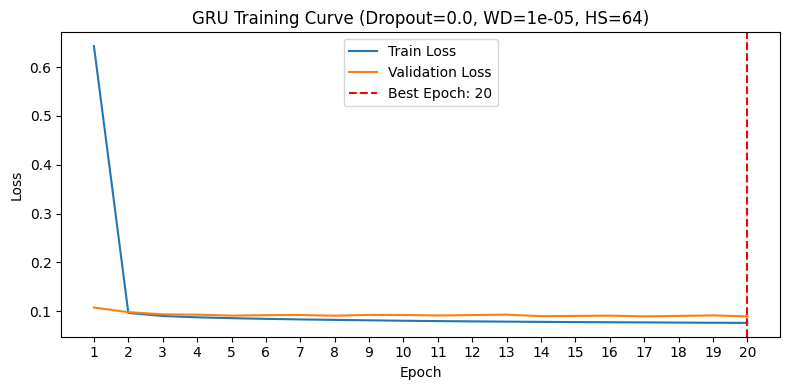

In [10]:
# Get best run per metric for GRU
best_gru_runs = []
for metric in metrics:
    run = df_gru.sort_values(by=metric, ascending=ascending_order[metric]).iloc[0]
    best_gru_runs.append(run)

# Convert to DataFrame and drop duplicates (e.g., same config wins multiple metrics)
best_gru_df = pd.DataFrame(best_gru_runs).drop_duplicates(subset=['dropout', 'weight_decay', 'hidden_size'])

# Plot training curves for GRU
for i, row in best_gru_df.iterrows():
    train_losses = ast.literal_eval(row['train_losses'])
    val_losses = ast.literal_eval(row['val_losses'])
    best_epoch = row['best_epoch']

    epochs = range(1, len(train_losses) + 1)  # Epochs start from 1

    plt.figure(figsize=(8, 4))
    plt.plot(epochs, train_losses, label='Train Loss')
    plt.plot(epochs, val_losses, label='Validation Loss')
    plt.axvline(x=best_epoch, color='r', linestyle='--', label=f'Best Epoch: {best_epoch}')
    plt.title(f"GRU Training Curve (Dropout={row['dropout']}, WD={row['weight_decay']}, HS={row['hidden_size']})")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.xticks(epochs)
    plt.legend()
    plt.tight_layout()
    plt.show()


### Average (by configuration)

In [11]:
# Group by GRU configuration to average results
df_grouped_gru = df_gru.groupby(['dropout', 'weight_decay', 'hidden_size']).mean(numeric_only=True).reset_index()

# Columns to display
display_columns = ['dropout', 'weight_decay', 'hidden_size',
                   'mae', 'rmse', 'mse', 'r2', 'training_duration_sec', 'early_stopping_patience', 'best_epoch']

# Loop through each metric and display top 3 averaged GRU configurations
for metric in metrics:
    print(f"\nTop Averaged GRU Configurations by {metric.upper()}:")
    ascending = metric != 'r2'  # R² is better when higher
    top_configs = df_grouped_gru.sort_values(by=metric, ascending=ascending).head(3)
    display(top_configs[display_columns])


Top Averaged GRU Configurations by MAE:


,dropout,weight_decay,hidden_size,mae,rmse,mse,r2,training_duration_sec,early_stopping_patience,best_epoch
0,0.0,0.00001,64,0.148702,0.280268,0.078555,0.985298,760.366667,7.5,12.333333
1,0.5,0.00001,64,0.157960,0.280685,0.078788,0.985277,747.976667,7.5,12.000000



Top Averaged GRU Configurations by RMSE:


,dropout,weight_decay,hidden_size,mae,rmse,mse,r2,training_duration_sec,early_stopping_patience,best_epoch
0,0.0,0.00001,64,0.148702,0.280268,0.078555,0.985298,760.366667,7.5,12.333333
1,0.5,0.00001,64,0.157960,0.280685,0.078788,0.985277,747.976667,7.5,12.000000



Top Averaged GRU Configurations by MSE:


,dropout,weight_decay,hidden_size,mae,rmse,mse,r2,training_duration_sec,early_stopping_patience,best_epoch
0,0.0,0.00001,64,0.148702,0.280268,0.078555,0.985298,760.366667,7.5,12.333333
1,0.5,0.00001,64,0.157960,0.280685,0.078788,0.985277,747.976667,7.5,12.000000



Top Averaged GRU Configurations by R2:


,dropout,weight_decay,hidden_size,mae,rmse,mse,r2,training_duration_sec,early_stopping_patience,best_epoch
0,0.0,0.00001,64,0.148702,0.280268,0.078555,0.985298,760.366667,7.5,12.333333
1,0.5,0.00001,64,0.157960,0.280685,0.078788,0.985277,747.976667,7.5,12.000000


## Training time analysis

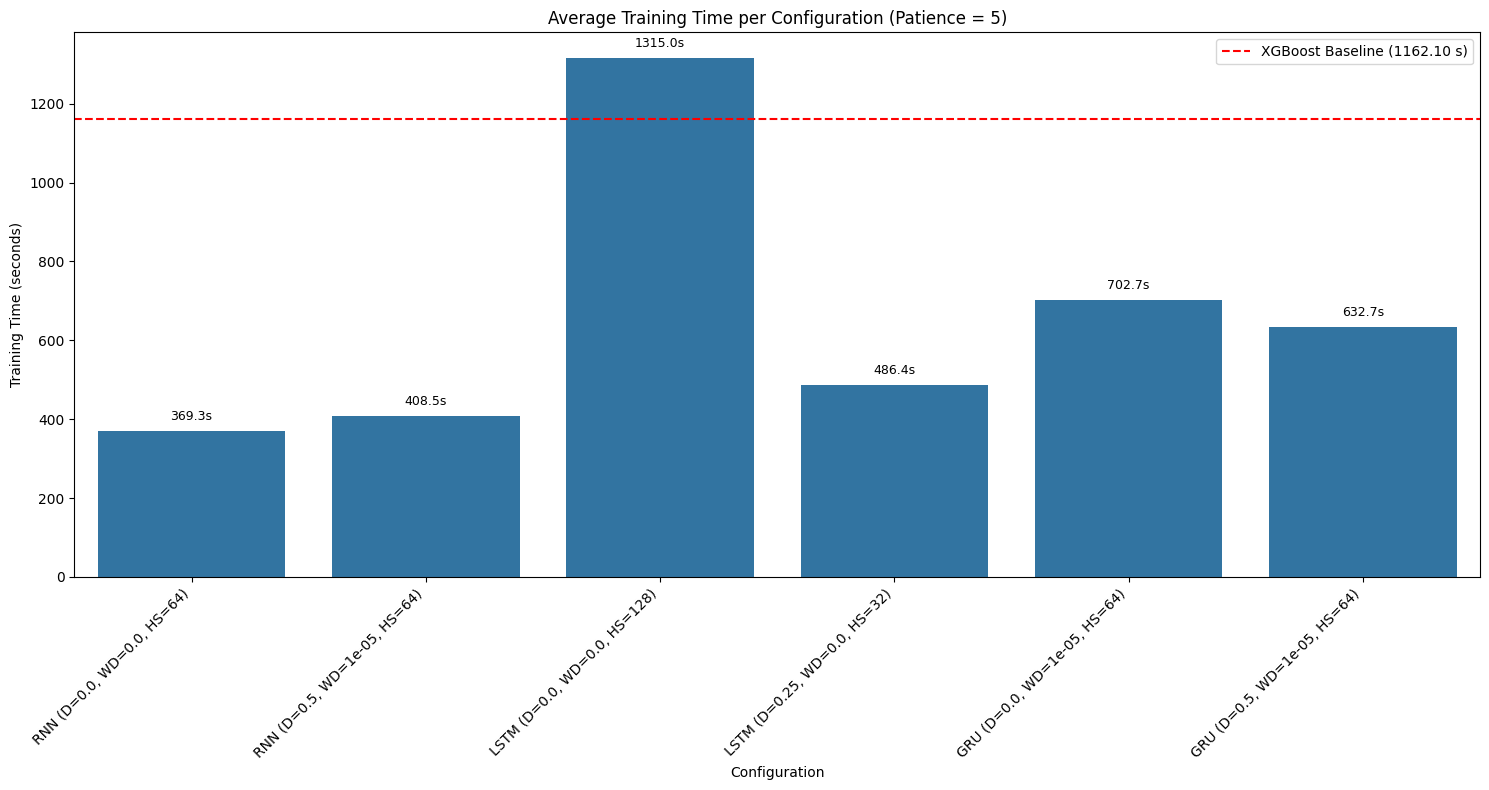

In [16]:
# Filter for patience = 5
df_patience5 = df[df['early_stopping_patience'] == 5]

# Define the six configurations (cell_type, dropout, weight_decay, hidden_size)
configs = [
    ('rnn',  0.0,  0.0,   64),
    ('rnn',  0.5,  1e-5,  64),
    ('lstm', 0.0,  0.0,  128),
    ('lstm', 0.25, 0.0,   32),
    ('gru',  0.0,  1e-5,  64),
    ('gru',  0.5,  1e-5,  64),
]

# Collect average training times with detailed labels
avg_times = []
for cell, d, wd, hs in configs:
    label = f"{cell.upper()} (D={d}, WD={wd}, HS={hs})"
    subset = df_patience5[
        (df_patience5['cell_type'] == cell) &
        (df_patience5['dropout'] == d) &
        (df_patience5['weight_decay'] == wd) &
        (df_patience5['hidden_size'] == hs)
    ]
    avg_time = subset['training_duration_sec'].mean()
    avg_times.append((label, avg_time))

# Create DataFrame for plotting
avg_time_df = pd.DataFrame(avg_times, columns=['Configuration', 'Avg Training Time (sec)'])

# Plot with baseline line and annotations
plt.figure(figsize=(15, 8))
ax = sns.barplot(data=avg_time_df, x='Configuration', y='Avg Training Time (sec)')
plt.axhline(y=1162.10, color='red', linestyle='--', label='XGBoost Baseline (1162.10 s)')
plt.title('Average Training Time per Configuration (Patience = 5)')
plt.ylabel('Training Time (seconds)')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Add text labels on top of each bar
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 20,  # Slightly above the bar
        f"{height:.1f}s",
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.tight_layout()
plt.show()
